# Auxilliary Figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from utils import grade

In [6]:
def ex_grades(ability, difficulty, noise=12.5):
    mean_ab = ability.mean()
#     print(f"mean ability: {mean_ab}")
    gr = 100 / (1+ np.exp(difficulty - (ability-mean_ab)))
    gr += np.random.normal(0, noise, size=gr.shape)
    return gr.clip(0, 100)

def plot_example_grades():
    colors = plt.color_sequences['tab10']
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)

    ability = 0
    difficulty = np.linspace(-5,5, num=100)

    min_grade = 0
    max_grade = 100
    
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade)
    plt.plot(difficulty, c, label="Ability = 0", linewidth=4, c=colors[0])
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=.5)
    plt.plot(difficulty, c, linewidth=1, c=colors[0], linestyle='dotted')
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=2)
    plt.plot(difficulty, c, linewidth=1, c=colors[0], linestyle='dashed')

        
    ability = 3
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade)
    plt.plot(difficulty, c, label="Ability = 3", linewidth=4, c=colors[2])
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=.5)
    plt.plot(difficulty, c, linewidth=1, c=colors[2], linestyle='dotted')
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=2)
    plt.plot(difficulty, c, linewidth=1, c=colors[2], linestyle='dashed')

    
    plt.xlabel("Difficulty", fontsize=12)
    plt.ylabel("Estimated grade", fontsize=12)
    first_legend = plt.legend(fontsize=12, loc='upper right')
    ax = plt.gca().add_artist(first_legend)
    
    
    custom_lines = [Line2D([0], [0], color='k', lw=1, linestyle='dotted'),
                    Line2D([0], [0], color='k', lw=2),
                    Line2D([0], [0], color='k', lw=1, linestyle='dashed')]
    
    second_legend = plt.legend(custom_lines, 
                              ['Sensitivity = 0.5', 'Sensitivity = 1', 'Sensitivity = 2'], 
                              loc='lower left', fontsize=12)
    ax = plt.gca().add_artist(second_legend)
    
    ########################################
    plt.subplot(122)
    difficulty = 0
    ability = np.linspace(-5,5, num=100)

    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade)
    plt.plot(ability, c, label="Difficulty = 0", linewidth=4)
    
    # Overplot example grades with scatter
    exab = np.linspace(-5,5, num=200)
    ex = ex_grades(exab, difficulty)
    plt.scatter(exab, ex, alpha=0.2)
    
    
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=.5)
    plt.plot(ability, c, linewidth=1, c=colors[0], linestyle='dotted')
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=2)
    plt.plot(ability, c, linewidth=1, c=colors[0], linestyle='dashed')


    difficulty = 3
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade)
    plt.plot(ability, c, label="Difficulty = 3", linewidth=4, c=colors[2])
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=.5)
    plt.plot(ability, c, linewidth=1, c=colors[2], linestyle='dotted')
    c = grade(ability, difficulty, min_grade=min_grade, max_grade=max_grade, sens=2)
    plt.plot(ability, c, linewidth=1, c=colors[2], linestyle='dashed')

    plt.xlabel("Ability", fontsize=12)
    # plt.ylabel("Estimated grade", fontsize=12)
    plt.legend(fontsize=12);
    
    plt.tight_layout()
    # plt.savefig('figures/grades.pdf')
    return


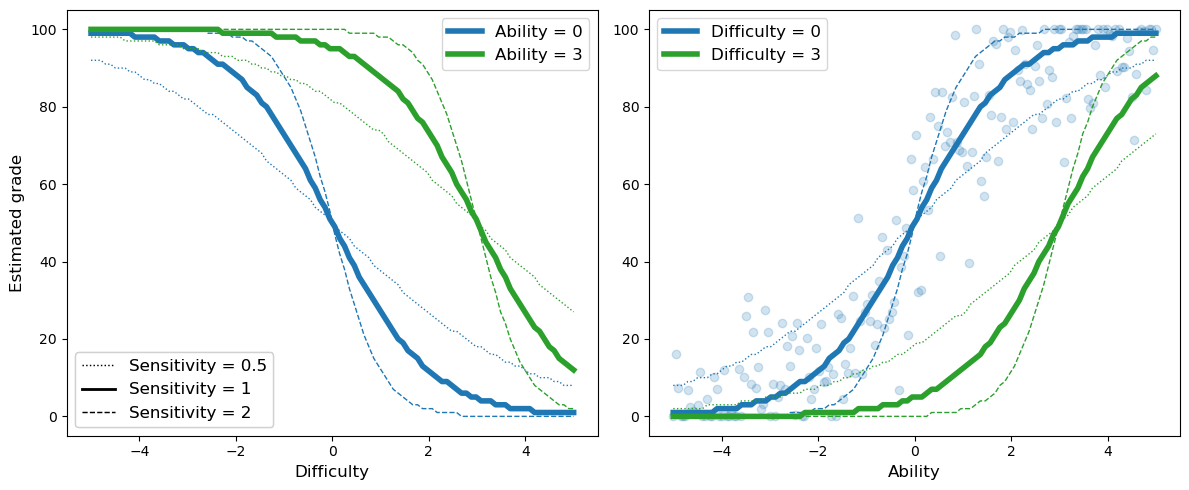

In [7]:
plot_example_grades()